In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import linregress
import math

In [2]:
filename='lab6Ribberink_Deere_Macadam_Schmidt_Ng_Ayem.csv'
headers=['time','temp','rh']
dtypes = ['datetime', 'float','float']
df = pd.read_csv(filename,names=headers, usecols = [0,3,4],header=3)

In [3]:
df = df.set_index('time')
time_dry = df['2020-02-14 11:26:00': '2020-02-14 11:29:00']
time_amb=df['2020-02-14 11:35:00': '2020-02-14 11:39:00']
time_hum=df['2020-02-14 11:41:30': '2020-02-14 11:44:30']

all_times=[time_dry,time_amb,time_hum]
df_clean=pd.concat(all_times)
df.reset_index(inplace=True)
time_dry.reset_index(inplace=True)
time_amb.reset_index(inplace=True)
time_hum.reset_index(inplace=True)
df_clean.reset_index(inplace=True)

## Question 1

Text(0.5,1,'Relative Humidity timeseries Camplbell Scientific')

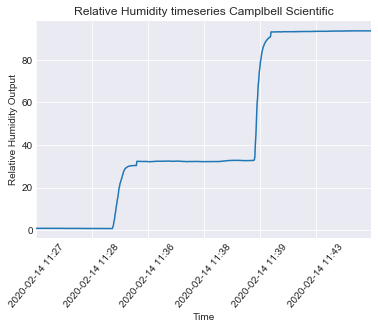

In [4]:
# multiple line plot
plt.style.use('seaborn-darkgrid')
df_clean.plot(x='time',y='rh',legend=False)
plt.xticks(rotation=50)
plt.ylabel('Relative Humidity Output')
plt.xlabel('Time')
plt.title('Relative Humidity timeseries Camplbell Scientific')

## Question 2

In [5]:
def vapour_pressure(T,RH):
    
    """
    find vapour pressure and relative humidity from a dataframe that measures both
    """
    A=6.112  #hPa
    B=17.67 
    C=243.5  #℃  
    
    #form Harrison 6.4
    es = A*np.exp((B*T)/(T+C))
    e = (RH*es)/100
    return e



Text(0.5,1,'Calculated Vapour Pressure (hPa)')

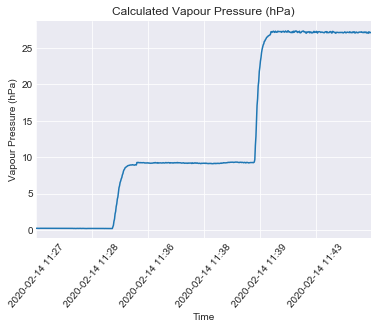

In [6]:
df_clean['vp']=vapour_pressure(df_clean.temp,df_clean.rh)
# multiple line plot
plt.style.use('seaborn-darkgrid')
df_clean.plot(x='time',y='vp',legend=False)
plt.xticks(rotation=50)
plt.ylabel('Vapour Pressure (hPa)')
plt.xlabel('Time')
plt.title('Calculated Vapour Pressure (hPa)')

In [7]:
time_dry_avg=time_dry.mean()
time_amb_avg=time_amb.mean()
time_hum_avg=time_hum.mean()
all_times_avg=[time_dry_avg,time_amb_avg,time_hum_avg]

# print(time_dry_avg,time_amb_avg,time_hum_avg)

In [8]:
def hPa_to_kPa(x):
    return (x*101.325)/1013.25

def find_mixing_ratio(e):
    e_kPa=hPa_to_kPa(e)
    return round((622*e_kPa)/(100-e_kPa),6)

for avg in all_times_avg:
    avg['e'] = vapour_pressure(avg.temp,avg.rh)

for avg in all_times_avg:
    avg['r'] = find_mixing_ratio(avg.e)

In [9]:
print(time_dry_avg.r,time_amb_avg.r,time_hum_avg.r)

1.123647 6.792036 17.377711
